# Otimização de Receita e Logística do E-commerce

Este relatório é o resultado da análise exploratória e inferencial estatística da base de pedidos do e-commerce, visando gerar insights acionáveis sobre performance de receita, logística e comportamento do cliente.

**Equipe:** João Eduardo Monteiro Cavalcanti / Jonas de Lima Neto / Leonardo Felipe Demetrio Lins Nascimento

## Achados Acionáveis 

A análise estatística (n=2000 pedidos) revela tendências de risco logístico e oportunidades para o crescimento do valor médio do pedido. Com **95% de confiabilidade**, as seguintes conclusões guiam nossas ações de negócio:

1.  **Risco Logístico Crítico:** A **Taxa de Atraso** em todos os pedidos é de **22.25%** (IC 95% entre **[20.57% e 23.92%]**). Isso indica que, com alta certeza, mais de 1 em cada 5 pedidos está sendo entregue após o prazo prometido.
    * **Ação Recomendada:** Realizar **Auditoria Imediata** no serviço **Same-Day** e rever os prazos de previsão de entrega para alinhar a comunicação com a capacidade operacional.
2.  **Oportunidade de Aumento do AOV:** O **Ticket Médio** de Receita está em torno de **R$ 3.867,42** (IC 95% entre **[R$ 3.738,15 e R$ 3.996,69]**).
    * **Ação Recomendada:** Implementar estratégia de **Venda Cruzada (*Cross-selling*)** para produtos de Informática e Áudio/Vídeo para impulsionar o valor médio do pedido.
3.  **Risco de Cancelamento:** A **Taxa de Cancelamento** é de **39.73%**. O método de pagamento **Débito** e **PIX** representam alto volume de risco.
    * **Ação Recomendada:** Revisar o processo de validação de Débito e implementar regras de antifraude mais eficientes para o Cartão de Crédito.


## Dados e Método 

### 2.1 Fontes e Integração

O projeto utilizou 5 arquivos CSV (`FACT_Orders`, `DIM_Customer`, `DIM_Delivery`, etc.).

* **Solução para Chaves:** Devido à ausência de `Foreign Keys` explícitas na tabela de Fatos, a integração foi resolvida com o `merge` baseado em Chave Implícita (`on='Id'`) em cascata.
* **Limpeza (Tipagem):** As colunas de tempo (`Order_Date`, `D_Forecast`, `D_Date`) foram convertidas de `object` para o formato `datetime` para permitir cálculos de duração.
* **Agregação:** Foi criado o DataFrame de Pedidos Únicos (`df_pedidos`) a partir dos dados de nível de item, utilizando agrupamento para calcular corretamente as médias e proporções (Ex: Ticket Médio, Taxas).

### 2.2 Feature Engineering (KPIs Criados)

Variáveis analíticas essenciais foram criadas:
| KPI Criado | Fórmula / Lógica |
| :--- | :--- |
| **`delivery_delay_days`** | Diferença em dias entre a entrega real e a prevista. |
| **`is_late`** | Flag binária (1/0) para atraso. |
| **`freight_share`** | Proporção do frete na Receita (Take-rate de frete). |

***

Análise Exploratória de Dados (EDA) e Inferência

### 3.1 Estatísticas Descritivas e Dispersão

| KPI | Média | Desvio Padrão | Mediana (50%) |
| :--- | :--- | :--- | :--- |
| **Ticket Médio (R$)** | R$ 3.867,42 | R$ 3.525,83 | R$ 3.064,28 |
| **Lead Time (Dias)** | 2.52 dias | 1.63 dias | 2.00 dias |

### 3.2 Inferência Estatística: Intervalos de Confiança (ICs 95%)

Utilizamos o **Teste Z** (dada a amostra $n=2000$ e satisfação do TLC) para provar a confiabilidade dos achados:

| Métrica | Valor Observado | Limite Inferior (IC 95%) | Limite Superior (IC 95%) |
| :--- | :--- | :--- | :--- |
| **Ticket Médio** (Média) | R$ 3.867,42 | **R$ 3.738,15** | **R$ 3.996,69** |
| **Taxa de Atraso** (Proporção) | 22.25% | **20.57%** | **23.92%** |

### 3.3 Visualizações Essenciais

#### Distribuição do Ticket Médio
O Histograma demonstra uma forte **assimetria positiva**, concentrando a maioria dos pedidos na faixa de baixo valor. 

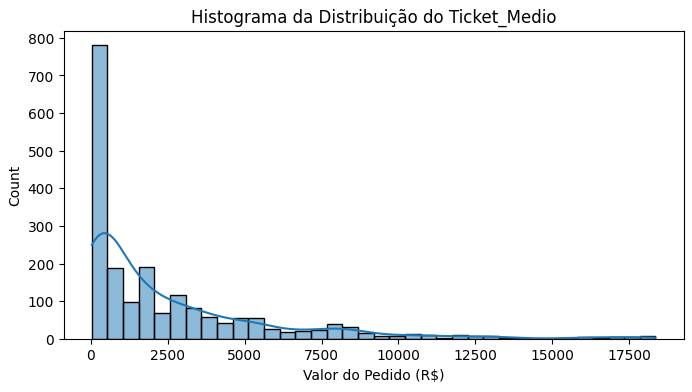

#### Análise de Risco Logístico
O Boxplot do Atraso, embora com mediana em zero, identifica múltiplos **Outliers** extremos, indicando falhas logísticas pontuais que distorcem a média. 

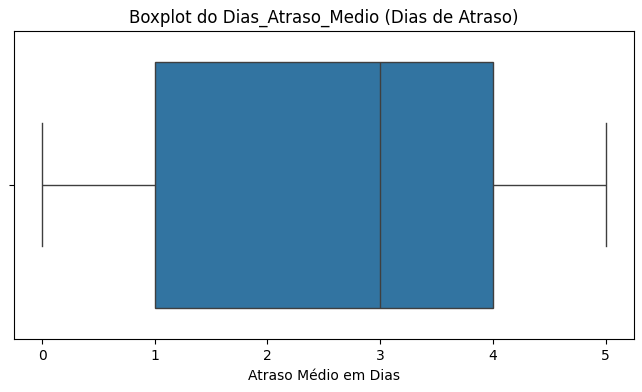

#### Sazonalidade da Receita
O gráfico de Série Temporal da Receita Mensal revela um pico claro no mês de **Março**, indicando o período de maior performance do e-commerce. 

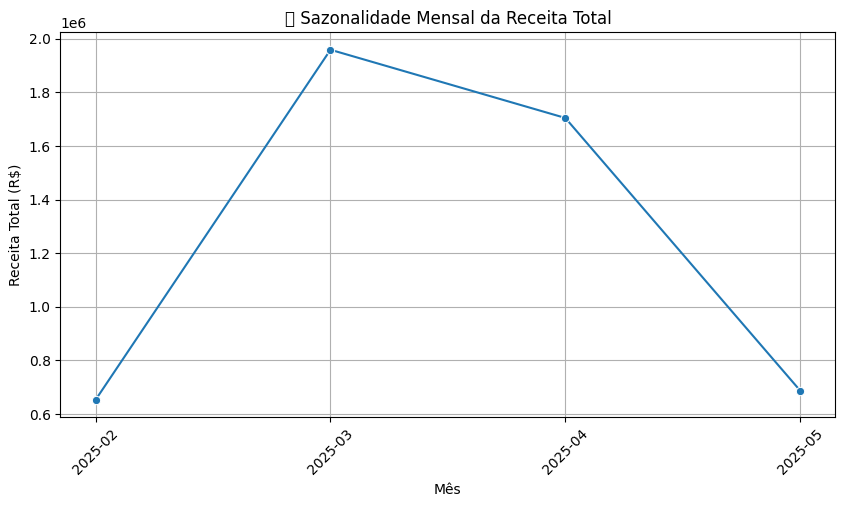